# Polynomial Regression With One Variable + Regularization
## X; Y - real data results:
$X = \begin{bmatrix}x_1\\x_2\\...\\x_m\end{bmatrix} \quad Y = \begin{bmatrix}y_1\\y_2\\...\\y_m\end{bmatrix}$
## Parameters vector:
$\theta =  \begin{bmatrix}\theta_0\\\theta_1\\...\\\theta_{n-1}\end{bmatrix} $ 
## Trait Vector: 
$\phi(x)= \begin{bmatrix}\phi_0(x)&\phi_1(x)&...&\phi_{n-1}(x)\end{bmatrix} = \begin{bmatrix}x^0&x^1&...&x^{n-1}\end{bmatrix}$  
## Design Matrix:
$ \Phi = \begin{bmatrix}\phi(x_1)\\\phi(x_2)\\...\\\phi(x_{m})\end{bmatrix}= \begin{bmatrix}x_1^0&x_1^1&....&x_1^{n-1}\\x_2^0&x_2^1&...&x_2^{n-1}\\...&...&...&...\\x_m^0&x_m^1&...&x_m^{n-1}\end{bmatrix} $

## Polynomial Function: 
$h_\theta(x) = \theta_0 x^0 + \theta_1 x^1 + ... + \theta_{n-1} x^{n-1}=\phi(x)\theta$

## Cost Function + Regularization: 
$J(\theta) =  \frac{1}{2m}  (\sum_{i=1}^{m}( h_\theta(x_i) - y_i)^2 + \sum_{i=1}^{n} \theta_j^2)$
## Gradient Descent Algorithm For Polynomial Regression + Regularization:

repeat until converegence {

$\theta_j:=\theta_j \cdot (1 - \alpha \frac{\lambda}{m}) -\alpha\frac{1}{m} \sum_{i=1}^{m} (h_\theta (x_i) - y_i)\cdot x_i^j)$ for j:=0,...,n-1

}

### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random
import unittest
import time
import sys

### Data Generator

In [2]:
def create_random_data_linear(N, start, stop, noise):
    """
    Creates totally random data especially for testing linear
    regression with one variable and two parameters: y = ax + b
    :param N: number of data examples
    :param start, stop: range for data randomization 
    :param noise: range of noise for data
    :return: dictionary with data 'x' and 'y'
    """
    xdata = np.random.uniform(start, stop, size=N)
    ydata = xdata/2 + np.random.uniform(-noise,noise, size=N)
    xdata+= np.random.uniform(-noise,noise, size=N)
    return {'x':np.array([[x] for x in xdata]), 'y':np.array([[y] for y in ydata])}

def create_random_data_sin(N, start, stop, noise=0.4, multiplier=1, power=1):
    """
    Creates totally random data with mathematic sin-like pattern 
    :param N: number of data examples
    :param start, stop: range for data randomization 
    :param noise: range of noise for data
    :param multipier: multiplies xdata, so it can be e.g. sin(2*x)
    :power: xdata to power e.g. sin(x^2)
    :return: dictionary with data 'x' and 'y'
    """
    xdata = np.random.uniform(start, stop, size=N)
    ydata = list()
    for n in range(N):
        ydata.append(1.4*math.sin((multiplier*xdata[n])**power) + random.uniform(-noise,noise))
        xdata[n] += random.uniform(-noise,noise)
    return {'x':np.array([[x] for x in xdata]), 'y':np.array([[y] for y in ydata])}

### Default Theta Generators

In [3]:
def theta_generator(n, value=1):
    """
    Creates vector Theta with first values of parameters
    :param n: number of parameters
    :param value: default parameter value
    :return: vector nx1
    """
    return np.array([[value] for i in range(n)])

def advanced_theta_generator(n, mini, maxi):
    """
    Creates vector Theta with first values of parameters
    These values are random
    :param n: number of parameters
    :param mini, maxi: range for parameters randomizer
    :param value: default parameter value
    :return: vector nx1
    """
    return np.array([[random.uniform(mini,maxi)] for i in range(n)])

### Implementation Of Design Matrix

In [4]:
def design_matrix(data_x, n):
    """
    Creates matrix as shown on top of the page
    :param data_x: vactor mx1 of xs
    :param n: number of parameters in polynomial
    :return: design matrix mxn
    """
    return np.array([data_x[:,0] ** i for i in range(n)]).T

### Calculating Polynomial's Result When X Is Given

In [5]:
def polynomial(x, theta):
    """
    Product of polynomial when certain x is given
    :param x: given value x
    :param theta: vector nx1 of parameters
    :return: calculated value
    """
    return np.sum([theta[i] * x ** i for i in range(np.shape(theta)[0])], axis=0)

### Implementation Of Cost Function: 

In [6]:
def cost_function(data_x, data_y, theta, lambdaa):
    """
    Calculates "how good" given polynomial is
    :param data_x, data_y: given values x and y
    :param theta: vector nx1 of parameters
    """
    m, _ = np.shape(data_x)
    regularization = lambdaa * np.sum(theta**2)
    sigma = np.sum((data_y - polynomial(data_x, theta)) ** 2)
    return 1/(2*m)*(sigma + regularization)

### Implementation Of Gradient Descent Algorithm For Polynomial Regression

In [7]:
def find_best_parameters(data_x, data_y, theta, alpha, iterations, n, lambdaa):
    """
    Calculates as good as possible in certain number of iterations
    parameters for polynomial to fit the data
    :param data_x, data_y: given values x (design matrix X) and y
    :param theta: vector nx1 of parameters
    :param alpha: size of "step" for each iteration
    :iterations: number of iterations
    :return: vector nx1 of parameters, cost value
    """
    m, _ = np.shape(data_x)
    design = design_matrix(data_x, n+1)
    for ii in range(iterations):
        buf = (design@theta - data_y)*design
        buf = np.sum(buf, axis = 0)
        theta = theta*(1 - alpha*lambdaa/m) - alpha/m*buf.reshape(len(buf), -1)
    return theta, cost_function(data_x, data_y, theta, lambdaa)

## Best Model Selection

In [8]:
def model_selection(data, iterations, n, alpha, def_theta):
    """
    Calculates thetas and costs for differen lamda values
    chooses ones that fit the most
    :param data_x, data_y: given values x an y
    :param theta: vector nx1 of parameters
    :param alpha: size of "step" for each iteration
    :iterations: number of iterations
    :return: cost value, best lambda vector nx1 of parameters
    nx1 parameters and cost for caluclations without regularization
    """
    print("\n")
    
    theta = theta_generator(n+1, def_theta)
    lambdass = [1e-34*10**i for i in range(10)]
    
    best_lambda = None
    best_theta = None
    best_cost = sys.maxsize * 2 + 1
    
    for i in range(len(lambdass)):
        buf_theta, buf_cost = find_best_parameters(data['x'], data['y'],theta, alpha, iterations, n, lambdass[i])
        if buf_cost < best_cost:
            best_cost = buf_cost
            best_lambda = lambdass[i]
            best_theta = buf_theta
        print(f"λ{i} ", end="")
    
    no_reg_theta, no_reg_cost = find_best_parameters(data['x'], data['y'],theta, alpha, iterations, n, 0)
    return best_cost, best_lambda, best_theta, no_reg_theta, no_reg_cost

## Plots Settings

In [9]:
x_min = -3.6
x_max = 3.6
y_min = -1.6
y_max = 1.6
period_x = 0.4
period_y = 0.2

def set_plot(data,i):
    """
    Just sets the plots' settings
    :param data: dictionary with xs and ys
    :param i: number of plot in figure
    """
    sub = fig.add_subplot(3, 2, i + 1)
    plt.xlabel("X Axis", fontsize=10)
    plt.ylabel("Y Axis", fontsize=10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    sub.set_xlim(x_min*1.01,x_max*1.01)
    sub.set_ylim(y_min*1.01, y_max*1.01)
    sub.set_xticks(np.arange(x_min, x_max, period_x))
    sub.set_yticks(np.arange(y_min, y_max, period_y))
    return sub

## Plots Drawing

In [10]:
def create_plot(data, iterations, n, alpha=0.0001, def_theta=0.1):
    """
    :param data: dictionary with xs and ys
    :param theta: vector nx1 of parameters
    :param alpha: size of "step" for each iteration
    :iterations: number of iterations
    :param n: number of parameters - 1
    """
    sub = set_plot(data,n-1)
    x_plot = np.array([[x] for x in np.arange(x_min+0.3,x_max-0.3,0.1)])
    
    start = time.perf_counter()
    best_cost, best_lambda, best_theta, no_reg_theta, no_reg_cost = model_selection(data, iterations, n, alpha, def_theta)
    elapsed = time.perf_counter ()
    print (f"\nParameters: {n+1} | Iterations: 10x{iterations}\nCalculating time: {elapsed - start}s")
    print(f"Cost: {best_cost}")
    print(f"Cost without regularization: {no_reg_cost}")
   
    y_plot = polynomial(x_plot, best_theta)
    sub.set_title(f"Number Of Parameters = {n+1}\nCost: {best_cost}\nBest λ: {best_lambda} ", fontsize=12)
    sub.plot(data['x'], data['y'], 'b x', markeredgecolor='red')
    sub.plot(x_plot, y_plot, 'orange', linewidth=4)
    sub.plot(x_plot, polynomial(x_plot, no_reg_theta), ':', linewidth=2, color='blue')

## Displaying Plots



λ0 λ1 λ2 λ3 λ4 λ5 λ6 λ7 λ8 λ9 
Parameters: 2 | Iterations: 10x100000
Calculating time: 17.00162021199958s
Cost: 0.3435134969907473
Cost without regularization: 0.3435134969907473


λ0 λ1 λ2 λ3 λ4 λ5 λ6 λ7 λ8 λ9 
Parameters: 3 | Iterations: 10x100000
Calculating time: 18.042484982000133s
Cost: 0.23291786828440159
Cost without regularization: 0.23291786828440159


λ0 λ1 λ2 λ3 λ4 λ5 λ6 λ7 λ8 λ9 
Parameters: 4 | Iterations: 10x100000
Calculating time: 18.505792431000373s
Cost: 0.23057511838242184
Cost without regularization: 0.23057511838242184


λ0 λ1 λ2 λ3 λ4 λ5 λ6 λ7 λ8 λ9 
Parameters: 5 | Iterations: 10x100000
Calculating time: 18.62517225099964s
Cost: 0.2084409064956486
Cost without regularization: 0.2084409064956486


λ0 λ1 λ2 λ3 λ4 λ5 λ6 λ7 λ8 λ9 
Parameters: 6 | Iterations: 10x5000000
Calculating time: 1053.3695261110006s
Cost: 0.20798359681405124
Cost without regularization: 0.20798359681405124


λ0 λ1 λ2 λ3 λ4 λ5 λ6 λ7 λ8 λ9 
Parameters: 7 | Iterations: 10x5000000
Calculating t

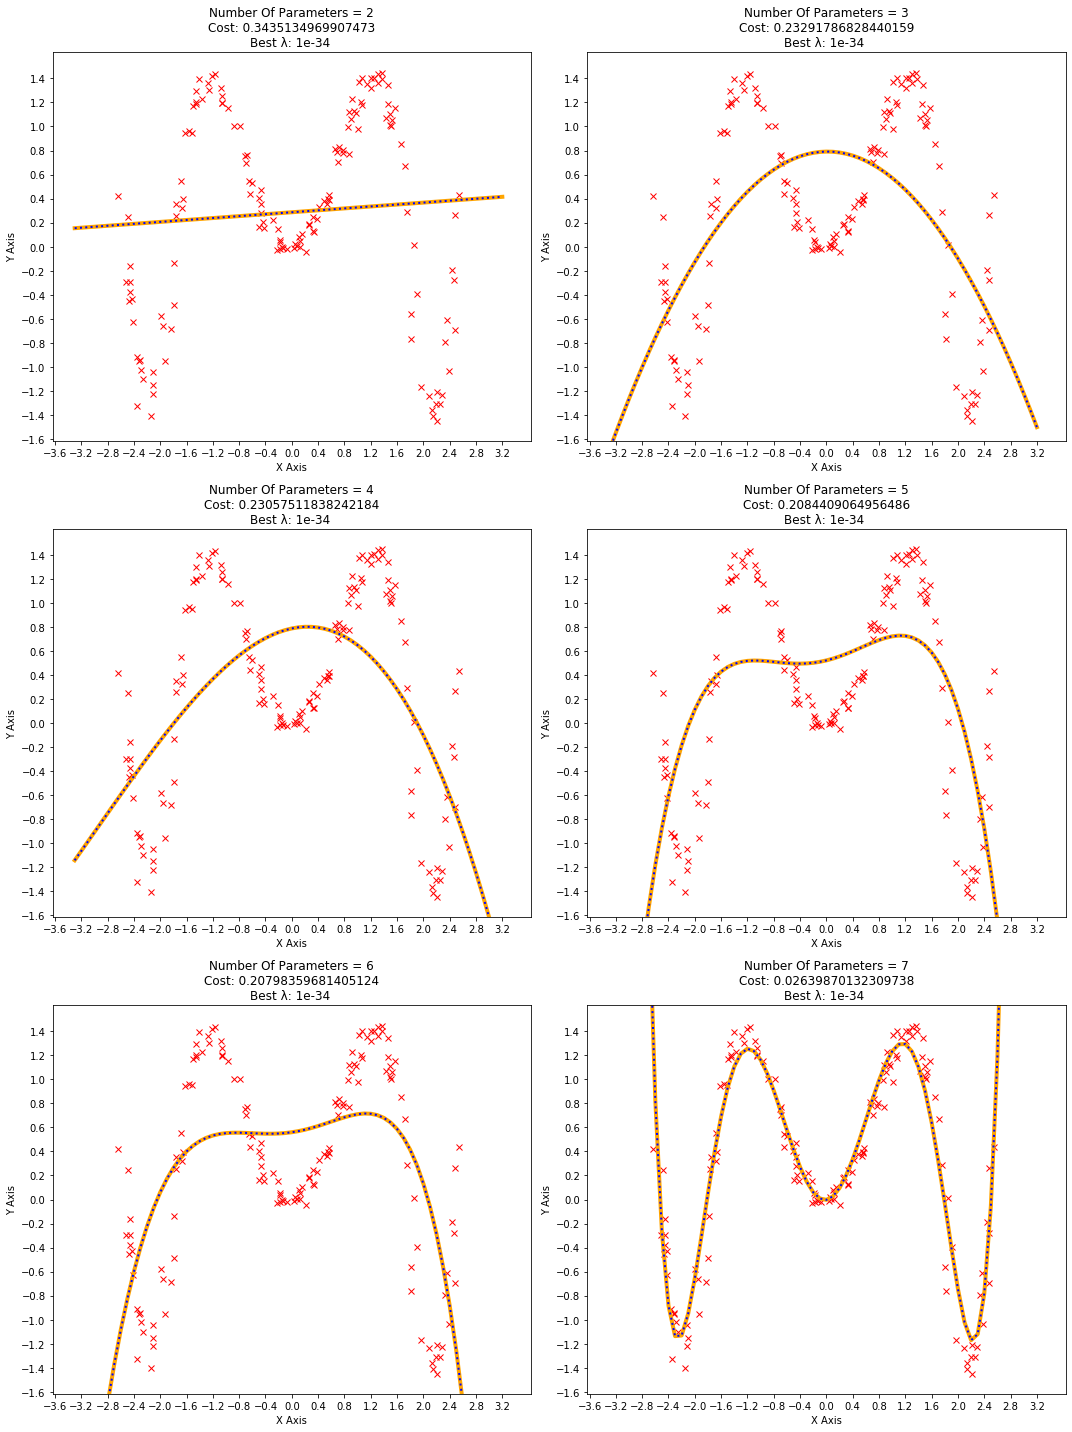

In [11]:
data = create_random_data_sin(150, -2.6, 2.6, 0.1, 1, 2)
fig = plt.figure(figsize=(15, 20))

create_plot(data, 100000, 1)
create_plot(data, 100000, 2)
create_plot(data, 100000, 3)
create_plot(data, 100000, 4)
create_plot(data, 5000000, 5)
create_plot(data, 5000000, 6, 0.00001)

plt.tight_layout()
plt.draw()